In [1]:
#!pip install seaborn
#%pip uninstall seaborn -y
#pip install seaborn
import seaborn as sns
from __future__ import division
import pandas as pd
import numpy as np
import logging
import math
import time
import statistics as stats
import json
from datetime import datetime, timedelta
import os, sys
import matplotlib.pyplot as plt
import glob
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import scale, normalize

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

from sklearn.feature_selection import RFE

In [2]:
feature_file_path = "features/vag_fd_features.csv"
f_df = pd.read_csv(feature_file_path)
print(f_df.head(2))

   class        FD   FD1_ext  FD1_ext_q1  FD1_ext_q2  FD2_flex  FD2_flex_q1  \
0      1  1.730273  1.714844    1.579943    1.614918  1.523159     1.886867   
1      1  1.883919  2.034394    2.061505    1.966511  2.145586     2.146737   

   FD2_flex_q2       VMS  
0     1.983273  0.000050  
1     2.223913  0.000016  


In [7]:
data = f_df.copy()
# labels
y = np.array(data["class"], dtype=np.int32)  # Convert labels to int32
# data
X = data.drop(columns=["class"], axis=1)
# scale
scaler = RobustScaler()
X = scaler.fit_transform(X)

In [8]:
# data frame for model analysis

metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall'],
                      columns=['knn', 'LDA'])
    

In [19]:
from sklearn.model_selection import cross_validate

# models
# KNN
knn = KNeighborsClassifier(n_neighbors=20, weights='distance', metric='euclidean', n_jobs=-1)

knn_scores = cross_validate(estimator=knn, X=X, y=y,
                       scoring=['neg_mean_squared_error','accuracy', 'r2'], cv=10, n_jobs=-1)

print("mean accuracy", knn_scores['test_accuracy'].mean())
knn_scores=pd.DataFrame(knn_scores)
#knn_scores

lda = LDA()
lda_scores = cross_validate(estimator=lda, X=X, y=y,
                       scoring=['neg_mean_squared_error','accuracy', 'r2'], cv=10, n_jobs=-1)

print("mean accuracy", lda_scores['test_accuracy'].mean())
lda_scores=pd.DataFrame(lda_scores)
lda_scores


mean accuracy 0.6194444444444445
mean accuracy 0.6763888888888888


,fit_time,score_time,test_neg_mean_squared_error,test_accuracy,test_r2
0,0.000000,0.014219,-0.333333,0.666667,-0.500000
1,0.014219,0.000000,-0.222222,0.777778,0.100000
2,0.014219,0.004613,-0.444444,0.555556,-0.800000
3,0.000000,0.004613,-0.222222,0.777778,0.100000
4,0.004011,0.000000,-0.666667,0.333333,-1.700000
5,0.000000,0.010194,-0.333333,0.666667,-0.350000
6,0.000000,0.000000,-0.444444,0.555556,-0.800000
7,0.000000,0.010194,-0.222222,0.777778,0.100000
8,0.000000,0.010138,-0.222222,0.777778,0.100000
9,0.000000,0.000000,-0.125000,0.875000,0.466667


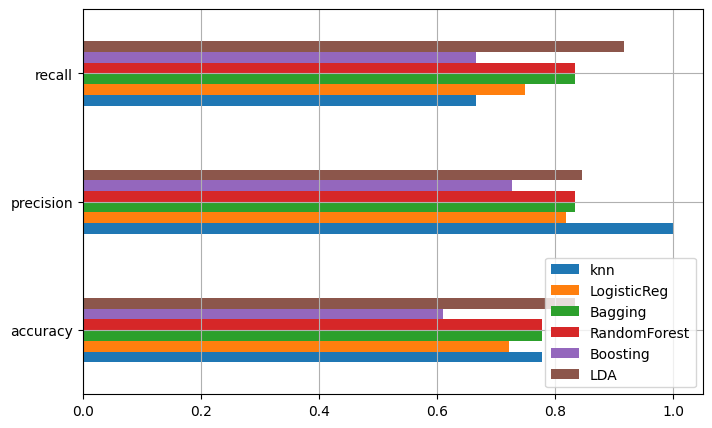

In [54]:
fig, ax = plt.subplots(figsize=(8,5))
metrics.plot(kind='barh', ax=ax)
ax.grid()